# Packages

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import matplotlib        as mt
from matplotlib.gridspec import GridSpec

In [2]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

# Dataset

In [3]:
my_data   = pd.read_csv('../Catalogue/Match07_smalldoubleclean_emlines.csv')
dust_data = pd.read_csv('../Match/ALL_GAMA_MAGPHYS_SELECTED.csv')

In [4]:
fuv_k = []
nuv_k = []
r_k = []
uvclass = []
for i in range(my_data['UV_CLASS_YI2011'].values.size):
    fuv_k.append(my_data['KCORR_FUV'].values[i])
    nuv_k.append(my_data['KCORR_NUV'].values[i])
    r_k.append(my_data['KCORR_R'].values[i])
    uvclass.append(my_data['UV_CLASS_YI2011'].values[i])

fuv_k   = np.array(fuv_k)
nuv_k   = np.array(nuv_k)
r_k     = np.array(r_k)
uvclass = np.array(uvclass)

header = np.array(['KCORR_FUV', 'KCORR_NUV', 'KCORR_R', 'UV_CLASS'])
kcorr_data = np.column_stack([fuv_k, nuv_k, r_k, uvclass])
kcorr_data = pd.DataFrame(kcorr_data, columns=header)

In [5]:
palette = ['#1b9e77','#d95f02','#7570b3']

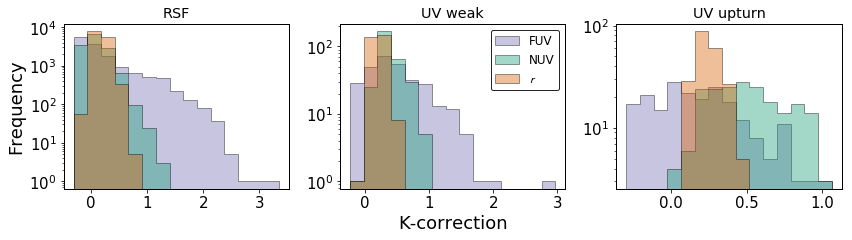

In [6]:
plt.rcParams.update(plotpars_3cols)

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='RSF'], bins=15, color=palette[2], edgecolor='black', 
                            alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='RSF'], bins=bins, color=palette[0], edgecolor='black', alpha=0.4, 
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='RSF'], bins=bins, color=palette[1], edgecolor='black', alpha=0.4, 
         label='$r$', histtype='stepfilled')
plt.title('RSF')
plt.ylabel('Frequency')
plt.yscale('log')


plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=15, color=palette[2], edgecolor='black',
                            alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=bins, edgecolor='black', color=palette[0], alpha=0.4,
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=bins, edgecolor='black', color=palette[1], alpha=0.4,
         label='$r$', histtype='stepfilled')
plt.title('UV weak')
# plt.ylabel('Frequency')
plt.xlabel('K-correction')
plt.yscale('log')
plt.legend(loc='best')

plt.subplot(1,3,3)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='UV_UPTURN'], bins=15, color=palette[2], 
                            edgecolor='black', alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='UV_UPTURN'], bins=bins, edgecolor='black', color=palette[0], alpha=0.4,
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='UV_UPTURN'],   bins=bins, edgecolor='black', color=palette[1], alpha=0.4,
         label='$r$', histtype='stepfilled')
plt.title('UV upturn')
plt.yscale('log')
plt.tight_layout()
plt.savefig('../LargeFilesResults/PaperFigs/kcorrections.pdf')
plt.savefig('../LargeFilesResults/PaperFigs/kcorrections.png')
plt.show()

In [7]:
new_match = my_data.merge(dust_data, on=['CATAID'], how='left', indicator=True)

L_dust_best_fit

L_dust_percentile2_5

L_dust_percentile16

L_dust_percentile50

L_dust_percentile84

L_dust_percentile97_5

mass_dust_best_fit

mass_dust_percentile2_5

mass_dust_percentile16

mass_dust_percentile50

mass_dust_percentile84

mass_dust_percentile97_5

tlastb_percentile2_5

tlastb_percentile16

tlastb_percentile50

tlastb_percentile84

tlastb_percentile97_5

_merge

In [8]:
for i in range(new_match['CATAID'].values.size):
    if new_match['_merge'].values[i]!='both':
        print (new_match['UV_CLASS_YI2011'].values[i])
        print (new_match['L_dust_best_fit'].values[i])
    else:
        continue

RSF
nan
RSF
nan


In [9]:
uv_weak_objs = new_match[new_match['UV_CLASS_YI2011']=='UV_WEAK']
uv_uptr_objs = new_match[new_match['UV_CLASS_YI2011']=='UV_UPTURN']

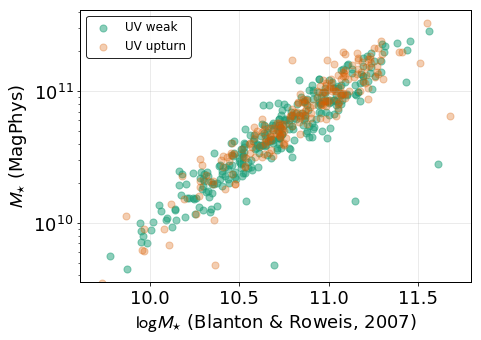

In [10]:
plt.rcParams.update(plotpars)
plt.scatter(x=uv_weak_objs['logmstar'], y=uv_weak_objs['mass_stellar_best_fit'], alpha=0.5, c=palette[0], 
            label='UV weak', s=50)
plt.scatter(x=uv_uptr_objs['logmstar'], y=uv_uptr_objs['mass_stellar_best_fit'], alpha=0.3, c=palette[1], 
            label='UV upturn', s=50)
plt.xlabel(r"$\log M_{\star}$ (Blanton & Roweis, 2007)")
plt.ylabel(r"$M_{\star}$ (MagPhys)")
plt.legend(loc='best')
plt.yscale('log')
# plt.xscale('log')
plt.grid(alpha=0.3)
plt.savefig('../LargeFilesResults/PaperFigs/stellar_masses.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_masses.pdf')
plt.show()

In [11]:
mass_fraction_uvup = dust_data['mass_stellar_best_fit']/dust_data['mass_dust_best_fit']

In [12]:
mass_fraction_uvup.columns = ['mass_fraction_magphys']

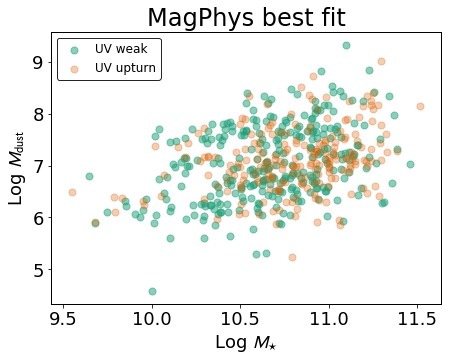

In [37]:
plt.rcParams.update(plotpars)
plt.title('MagPhys best fit')

plt.scatter(x=np.log10(uv_weak_objs['mass_stellar_best_fit'].values), 
            y=np.log10(uv_weak_objs['mass_dust_best_fit'].values), label='UV weak', alpha=0.5, c=palette[0], s=50)
plt.scatter(x=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), alpha=0.3, c=palette[1], label='UV upturn', s=50)
plt.xlabel(r"Log $M_{\star}$")
plt.ylabel(r"Log $M_{\rm{dust}}$")
plt.legend(loc='best')
# plt.yscale('log')
# plt.xscale('log')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.pdf')
plt.show()

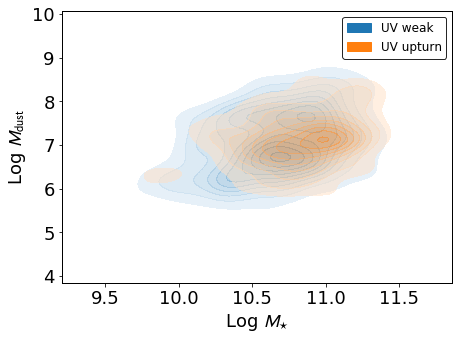

In [23]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=np.log10(uv_weak_objs['mass_stellar_best_fit'].values),
            data2=np.log10(uv_weak_objs['mass_dust_best_fit'].values), 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            data2=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
# plt.axhline(y=0., lw=0.5, color='black')
# plt.axvline(x=0., lw=0.5, color='black')
plt.legend(loc='best')
plt.xlabel(r"Log $M_{\star}$")
plt.ylabel(r"Log $M_{\rm{dust}}$")
# plt.ylim([-0.5e8, 1e8])
# plt.xlim([-0.5e11, 2.5e11])
# plt.ticklabel_format(axis='both', useMathText=True)
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass.pdf')
plt.show()

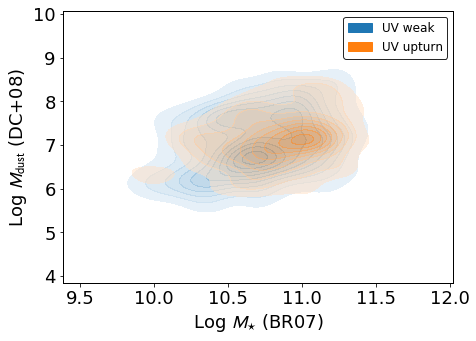

In [35]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=uv_weak_objs['logmstar'].values, data2=np.log10(uv_weak_objs['mass_dust_best_fit'].values), 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=uv_uptr_objs['logmstar'].values, data2=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.legend(loc='best')
plt.xlabel(r"Log $M_{\star}$ (BR07)")
plt.ylabel(r"Log $M_{\rm{dust}}$ (DC+08)")
# plt.ylim([-0.5e8, 1e8])
# plt.ticklabel_format(axis='y', useMathText=True)
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.png')
plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.pdf')
plt.show()

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


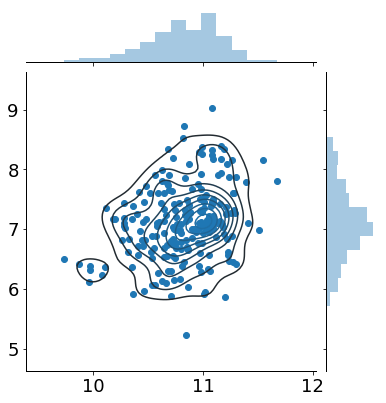

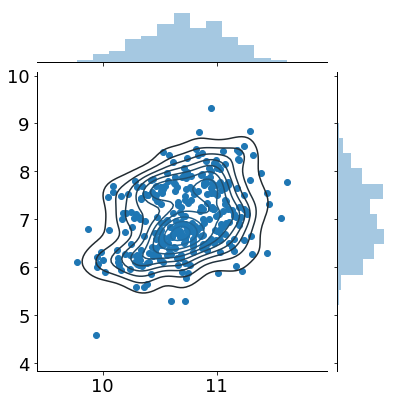

In [46]:
jup = sns.jointplot(x=uv_uptr_objs['logmstar'].values, 
                    y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values)).plot_joint(sns.kdeplot)

jwk = sns.jointplot(x=uv_weak_objs['logmstar'].values, 
                    y=np.log10(uv_weak_objs['mass_dust_best_fit'].values)).plot_joint(sns.kdeplot)

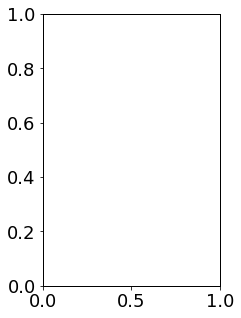

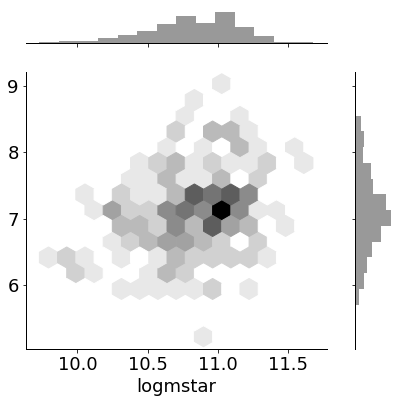

In [83]:
with sns.axes_style():
    
    plt.subplot(1,2,1)
    plot01 = sns.jointplot(x=uv_uptr_objs['logmstar'], y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), 
                           kind='hex', color='k', label="UV upturn")
    
#     plt.subplot(1,2,2)
#     sns.jointplot(x=uv_weak_objs['logmstar'].values, y=np.log10(uv_weak_objs['mass_dust_best_fit'].values), kind='hex', 
#               color='c', label="UV weak")
#     plt.legend(loc='best')

    plt.tight_layout()
plt.show()

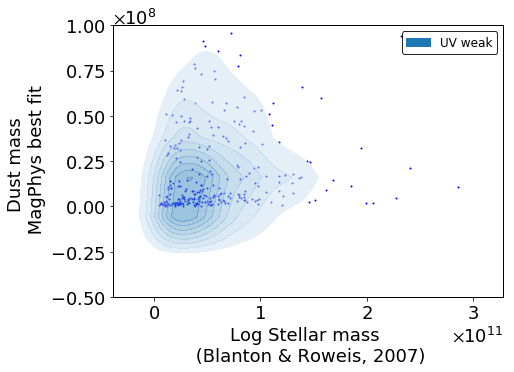

In [43]:
plt.rcParams.update(plotpars)
plt.scatter(x=uv_weak_objs['mass_stellar_best_fit'].values, y=uv_weak_objs['mass_dust_best_fit'].values, s=1., 
            c='blue')
sns.kdeplot(data=uv_weak_objs['mass_stellar_best_fit'].values, data2=uv_weak_objs['mass_dust_best_fit'].values, 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
# sns.kdeplot(data=uv_uptr_objs['logmstar'].values, data2=uv_uptr_objs['mass_dust_best_fit'].values, 
#             label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Log Stellar mass \n (Blanton & Roweis, 2007)')
plt.ylabel('Dust mass \n MagPhys best fit')
plt.ylim([-0.5e8, 1e8])
plt.ticklabel_format(axis='both', useMathText=True)
# plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.png')
# plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.pdf')
plt.show()

In [87]:
sns.jointplot?

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


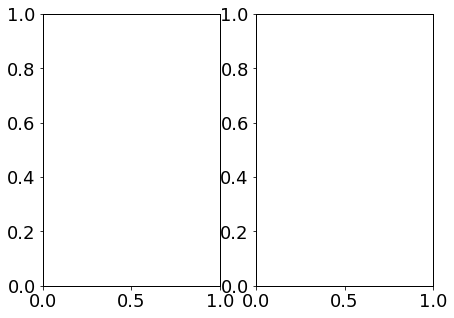

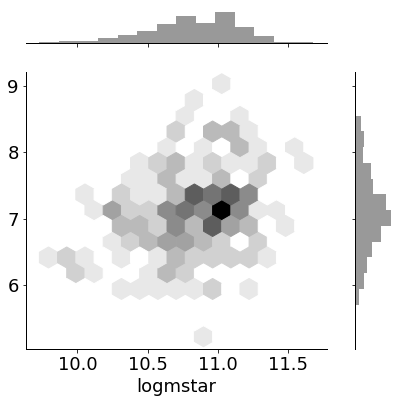

In [96]:
# fig = plt.figure(figsize=(8,6))
gridkw = dict(width_ratios=[1, 1])
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw=gridkw)


p1 = sns.jointplot(x=uv_uptr_objs['logmstar'], y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), kind='hex', 
              color='k', label="UV upturn")

# sns.jointplot(x=uv_weak_objs['logmstar'].values, y=np.log10(uv_weak_objs['mass_dust_best_fit'].values), kind='hex', 
#               color='c', label="UV weak", ax=ax02)

plt.tight_layout()

plt.show()


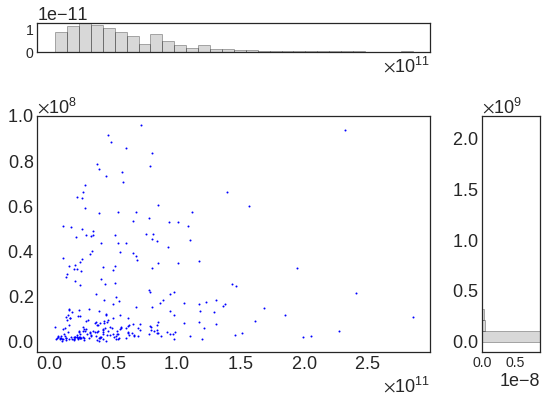

In [84]:
with plt.style.context("seaborn-white"):
#     plt.rcParams["axes.edgecolor"] = "0.15"
#     plt.rcParams["axes.linewidth"] = 1.
      
    fig = plt.figure(figsize=(8,6))
    gs  = GridSpec(4,4, height_ratios=[2.,1.5,3.,3.], width_ratios=[3.,1.5,3.,1.5])

    ax_joint  = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])
    
    # Scatter plot -- MAIN PLOT ------------------------------------------------------------------------------------
    ax_joint.scatter(x=uv_weak_objs['mass_stellar_best_fit'].values, y=uv_weak_objs['mass_dust_best_fit'].values, 
                     s=1., c='blue')
    ax_joint.set_ylim([-0.05e8, 1e8])
    ax_joint.ticklabel_format(axis='both', useMathText=True)
#     sns.kdeplot(data=uv_weak_objs['mass_stellar_best_fit'].values, data2=uv_weak_objs['mass_dust_best_fit'].values, 
#             label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
#     ax_joint.xaxis.set_major_locator(mt.ticker.MultipleLocator(1))
#     ax_joint.yaxis.set_major_locator(mt.ticker.MultipleLocator(1))
#     ax_joint.tick_params('both', labelsize='14')
#     l1 = ax_joint.legend(loc='lower left', numpoints=1, fontsize=14, frameon=True, framealpha=0.85)
#     l1.get_frame().set_edgecolor('black')
    
    # Mr distribution -- on the top --------------------------------------------------------------------------------
    n, bins, patches = ax_marg_x.hist(uv_weak_objs['mass_stellar_best_fit'].values, color='gray', alpha=0.3, bins=30, 
                                      edgecolor='black', density=True)
    ax_marg_x.tick_params('both', labelsize='14')
    ax_marg_x.ticklabel_format(axis='x', useMathText=True)
    
  
    
    # g-r distribution --on the right ----------------------------------------------------------------------------
    n, bins, patches = ax_marg_y.hist(uv_weak_objs['mass_dust_best_fit'].values, orientation="horizontal", 
                                      color='gray', alpha=0.3, bins=20, edgecolor='black', density=True)

    ax_marg_y.tick_params(axis='x', labelsize='14')
    ax_marg_y.ticklabel_format(axis='y', useMathText=True)
#     ax_marg_y.set_ylim([-0.05e8, 1e8])
    
   # Turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
#     plt.setp(ax_marg_y.get_yticklabels(), visible=False)

#     # Set labels on joint
#     ax_joint.set_xlabel("$M_{\star}$", fontsize=15)
#     ax_joint.set_ylabel("M_{\rm{dust}}", fontsize=15)

#     # Set labels on marginals
#     ax_marg_y.set_xlabel('$M_{\star}$ \n frequency', fontsize=15)
#     ax_marg_x.set_ylabel('M_{\rm{dust}} \n frequency', fontsize=15)
    
#     plt.savefig('../../Figs/g2_cmag_opt_dist.pdf')
#     plt.savefig('../../Figs/g2_cmag_opt_dist.png')
    plt.tight_layout()
    plt.show()

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

In [ ]:
plt.rcParams.update(plotpars)
plt.hexbin(x=(uv_weak_objs['mass_stellar_best_fit'].values/1e11), y=(uv_weak_objs['mass_dust_best_fit'].values/1e8), 
           gridsize=30, cmap=plt.cm.ocean_r, edgecolor='black', lw=0.1, bins='log',
           alpha=0.9)
# plt.yscale('log')
# plt.ticklabel_format(axis='both', useMathText=True)
plt.xlabel('Stellar mass ($10^{11}$) \n MagPhys best fit')
plt.ylabel('Dust mass ($10^{8}$) \n MagPhys best fit')
# plt.ylim([-0.01e8, 1e8])
plt.show()

In [ ]:
plt.rcParams.update(plotpars)
plt.hexbin(x=(uv_weak_objs['mass_stellar_best_fit'].values/1e11), y=(uv_weak_objs['mass_dust_best_fit'].values/1e8), 
           gridsize=25, cmap=plt.cm.ocean_r, edgecolor='black', lw=0.1, bins='log',
           alpha=0.9)
# plt.yscale('log')
# plt.ticklabel_format(axis='both', useMathText=True)
plt.xlabel('Stellar mass ($10^{11}$) \n MagPhys best fit')
plt.ylabel('Dust mass ($10^{8}$) \n MagPhys best fit')
# plt.ylim([-0.01, 10])
plt.show()

In [ ]:
plt.rcParams.update(plotpars)
plt.hexbin(x=np.log10(uv_weak_objs['mass_stellar_best_fit'].values), y=(uv_weak_objs['mass_dust_best_fit'].values/1e8), 
           gridsize=15, cmap=plt.cm.Purples, edgecolor='black', lw=0.1, bins='log',
           alpha=0.9)
# plt.yscale('log')
# plt.ticklabel_format(axis='both', useMathText=True)
plt.xlabel('Log stellar mass \n MagPhys best fit')
plt.ylabel('Dust mass ($10^{8}$) \n MagPhys best fit')
# plt.ylim([-0.01, 10])
plt.show()

In [ ]:
plt.rcParams.update(plotpars)
plt.hexbin(x=(uv_weak_objs['logmstar'].values), y=(uv_weak_objs['mass_dust_best_fit'].values/1e8), 
           gridsize=15, cmap=plt.cm.Purples, edgecolor='black', lw=0.1, bins='log',
           alpha=0.9)
# plt.yscale('log')
# plt.ticklabel_format(axis='both', useMathText=True)
plt.xlabel('Log stellar mass \n Blanton & Roweis (2007)')
plt.ylabel('Dust mass ($10^{8}$) \n MagPhys best fit')
# plt.ylim([-0.01, 10])
plt.show()

In [ ]:
# plt.rcParams.update(plotpars)

# n1, bins1, patches1 = plt.hist(uv_weak_objs['L_dust_best_fit'], color='blue', bins=20, alpha=0.5, label='UV weak', 
#                                edgecolor='black')
# bins1_centers = (bins1[1:]+bins1[:-1])/2
# plt.errorbar(x=bins1_centers, y=n1, yerr=0.5, ecolor='black', color='black', fmt='r.')
# plt.yscale('log')
# plt.xlabel('Dust luminosity')
# plt.ylabel('Frequency')
# plt.ticklabel_format(axis='x', useMathText=True)
# plt.legend(loc='best')
# plt.show()

In [ ]:
# palette = ['#1b9e77','#d95f02','#7570b3']

# plt.rcParams.update(plotpars)

# n1, bins1, patches1 = plt.hist(uv_weak_objs['L_dust_percentile50'], color=palette[0], bins=20, alpha=0.4, 
#                                edgecolor='black', label='median')
# # n2, bins2, patches2 = plt.hist(uv_weak_objs['L_dust_percentile16'], color=palette[1], bins=bins1, alpha=0.4, 
# #                                edgecolor='black', label='16%')
# # n3, bins3, patches3 = plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[2], bins=bins1, alpha=0.4, 
# #                                edgecolor='black', label='84%')
# plt.hist(uv_weak_objs['L_dust_percentile16'], color=palette[1], bins=bins1, alpha=0.4, edgecolor='black', label='16%')
# plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[2], bins=bins1, alpha=0.4, edgecolor='black', label='84%')
# bins1_centers = (bins1[1:]+bins1[:-1])/2
# plt.errorbar(x=bins1_centers, y=n1, yerr=np.sqrt(n1), ecolor='black', fmt='r.')
# # plt.errorbar(x=bins1_centers, y=n2, yerr=np.sqrt(n2), ecolor='gray', fmt='r.')
# # plt.errorbar(x=bins1_centers, y=n3, yerr=np.sqrt(n3), ecolor='gray', fmt='r.')
# # n2, bins2, patches2 = plt.hist(uv_uptr_objs['L_dust_percentile50'], histtype='stepfilled', color='green', bins=bins1, 
# #                                alpha=0.5, label='UV upturn', edgecolor='black')
# plt.yscale('log')
# plt.xlabel('Dust luminosity ')
# plt.ylabel('Frequency')
# plt.ticklabel_format(axis='x', useMathText=True)
# plt.legend(loc='best')
# plt.show()

In [ ]:
# palette = ['#1b9e77','#d95f02','#7570b3']

# plt.rcParams.update(plotpars)

# sns.kdeplot(uv_weak_objs['L_dust_percentile50'], color=palette[0], label='median', shade=True)
# sns.kdeplot(uv_weak_objs['L_dust_percentile16'], color=palette[1], label='16%', shade=True)
# sns.kdeplot(uv_weak_objs['L_dust_percentile84'], color=palette[2], label='84%', shade=True)

# # plt.hist(uv_weak_objs['L_dust_percentile84'], color=palette[1], bins=bins1, alpha=0.4, edgecolor='black', 
# #          histtype='stepfilled', label='84%')
# # bins1_centers = (bins1[1:]+bins1[:-1])/2
# # plt.errorbar(x=bins1_centers, y=n1, yerr=0.5, color='black', fmt='r.')
# # n2, bins2, patches2 = plt.hist(uv_uptr_objs['L_dust_percentile50'], histtype='stepfilled', color='green', bins=bins1, 
# #                                alpha=0.5, label='UV upturn', edgecolor='black')
# # plt.yscale('log')
# plt.xlabel('Dust luminosity percentiles')
# plt.ylabel('Frequency')
# # plt.ticklabel_format(axis='x', useMathText=True)
# plt.legend(loc='best')
# plt.show()